In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
# Đọc dữ liệu huấn luyện từ file CSV
df_train = pd.read_csv('data_train_filter.csv')

In [ ]:
df_train.head()

,Date,AAA,AAM,ABT,ACB,ACC,ACL,ADC,AGR,ALT,...,VSC,VSH,VSI,VTB,VTC,VTO,VTV,VXB,WCS,WSS
0,1/1/2014,0.299126,0.057697,0.095981,0.009980,0.060930,-0.073207,0.030972,-0.045035,-0.097778,...,0.231390,0.116178,0.133949,-0.033204,0.189487,0.029928,0.127564,-0.018864,0.180107,-0.085235
1,2/1/2014,-0.031877,0.044365,0.021541,0.033688,0.064690,-0.022702,0.351550,0.038298,0.334612,...,-0.028246,-0.054369,0.044883,0.180152,0.160813,0.115870,0.224864,-0.109773,0.050530,0.072341
2,3/1/2014,0.062762,0.023498,0.068187,0.002085,0.096594,0.027298,-0.096177,0.735798,-0.058889,...,0.038755,0.116832,0.246927,-0.046348,0.453751,0.170730,0.161178,0.072045,0.030107,0.481432
3,4/1/2014,-0.174229,-0.054131,0.033199,-0.051453,0.031971,-0.012898,-0.047960,-0.168780,-0.014445,...,-0.086640,-0.047288,-0.034679,-0.016110,0.007265,-0.140410,-0.136312,0.211935,0.020519,-0.172415
4,5/1/2014,-0.008127,-0.080398,-0.033901,-0.019575,-0.084864,-0.080954,-0.118928,0.003090,-0.006693,...,-0.077857,0.006205,-0.225161,-0.068284,-0.148120,-0.040144,0.038142,-0.172710,-0.093967,-0.131776


In [ ]:
# Loại bỏ cột thời gian và chuyển đổi thành mảng numpy
dataset_train = df_train.drop(columns=['Date']).values


In [ ]:
dataset_train

array([[ 0.29912562,  0.05769735,  0.09598056, ..., -0.01886379,
         0.18010717, -0.08523507],
       [-0.03187671,  0.0443649 ,  0.02154149, ..., -0.10977289,
         0.05052971,  0.07234068],
       [ 0.06276199,  0.02349821,  0.06818707, ...,  0.0720453 ,
         0.03010717,  0.48143159],
       ...,
       [-0.17267938, -0.08589239, -0.06969457, ..., -0.37021515,
        -0.10535667, -0.1153426 ],
       [ 0.03041377, -0.04885362,  0.09893889, ..., -0.01886379,
        -0.007912  ,  0.01714588],
       [-0.05512177,  0.1170811 , -0.11144097, ..., -0.10977289,
         0.00318409, -0.01856841]])

In [ ]:
# Chuẩn hóa dữ liệu huấn luyện về khoảng (0, 1)
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(dataset_train)

In [ ]:
training_set_scaled

array([[1.        , 0.57912182, 0.76085965, ..., 0.53941909, 0.62246372,
        0.23045267],
       [0.37883225, 0.53759544, 0.58857724, ..., 0.39984911, 0.34826817,
        0.44444444],
       [0.55643374, 0.47260229, 0.69653417, ..., 0.67898906, 0.30505256,
        1.        ],
       ...,
       [0.11459822, 0.13188503, 0.37741973, ..., 0.        , 0.018401  ,
        0.18956591],
       [0.49572821, 0.24724915, 0.76770643, ..., 0.53941909, 0.22460117,
        0.36948854],
       [0.33520995, 0.76408349, 0.28080153, ..., 0.39984911, 0.24808133,
        0.32098765]])

In [ ]:
# Tạo dữ liệu huấn luyện cho mô hình LSTM
time_steps = 8  # Số bước thời gian
X_train = []
y_train = []

for i in range(time_steps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-time_steps:i, :])
    y_train.append(training_set_scaled[i, :])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Xây dựng mô hình LSTM
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=dataset_train.shape[1]))  # Đầu ra là số lượng cột dữ liệu cần dự đoán

regressor.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Huấn luyện mô hình
regressor.fit(X_train, y_train, epochs=300, batch_size=32)

Epoch 1/300
2/2 [==============================] - 0s 31ms/step - loss: 0.0052
Epoch 2/300
2/2 [==============================] - 0s 42ms/step - loss: 0.0063
Epoch 3/300
2/2 [==============================] - 0s 29ms/step - loss: 0.0066
Epoch 4/300
2/2 [==============================] - 0s 50ms/step - loss: 0.0056
Epoch 5/300
2/2 [==============================] - 0s 49ms/step - loss: 0.0051
Epoch 6/300
2/2 [==============================] - 0s 43ms/step - loss: 0.0063
Epoch 7/300
2/2 [==============================] - 0s 51ms/step - loss: 0.0067
Epoch 8/300
2/2 [==============================] - 0s 47ms/step - loss: 0.0066
Epoch 9/300
2/2 [==============================] - 0s 64ms/step - loss: 0.0057
Epoch 10/300
2/2 [==============================] - 0s 71ms/step - loss: 0.0068
Epoch 11/300
2/2 [==============================] - 0s 44ms/step - loss: 0.0066
Epoch 12/300
2/2 [==============================] - 0s 52ms/step - loss: 0.0058
Epoch 13/300
2/2 [==============================]

In [ ]:
# Lưu mô hình
regressor.save("mymodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load mô hình
regressor.load_weights("mymodel.h5")

In [ ]:
# Đọc dữ liệu kiểm tra từ file CSV
df_test = pd.read_csv('data_test_filter.csv')

# Loại bỏ cột thời gian và chuyển đổi thành mảng numpy
dataset_test = df_test.drop(columns=['Date']).values

# Chuẩn hóa dữ liệu kiểm tra về khoảng (0, 1) dùng MinMaxScaler đã fit từ dữ liệu huấn luyện
test_set_scaled = sc.transform(dataset_test)

In [ ]:
# Chuẩn bị dữ liệu kiểm tra cho mô hình
X_test = []
y_test = []

for i in range(time_steps, len(test_set_scaled)):
    X_test.append(test_set_scaled[i-time_steps:i, :])
    y_test.append(test_set_scaled[i, :])

X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
# Dự đoán giá trị từ mô hình đã huấn luyện
predicted_data_scaled = regressor.predict(X_test)

# Đảo ngược chuẩn hóa để có giá trị dự đoán thực tế
predicted_data = sc.inverse_transform(predicted_data_scaled)

# Đảo ngược chuẩn hóa dữ liệu kiểm tra để có giá trị thực tế
actual_data = dataset_test[time_steps:]

1/1 [==============================] - 0s 28ms/step


In [ ]:
# Đo lường độ chính xác của mô hình
mae = mean_absolute_error(actual_data, predicted_data)
mse = mean_squared_error(actual_data, predicted_data)
mape = np.mean(np.abs((actual_data - predicted_data) / actual_data)) * 100

print('Mean Absolute Error (MAE): ', mae)
print('Mean Squared Error (MSE): ', mse)
print('Mean Absolute Percentage Error (MAPE): ', mape)

Mean Absolute Error (MAE):  0.11564520120934234
Mean Squared Error (MSE):  0.030744924524158723
Mean Absolute Percentage Error (MAPE):  361.0381159996607


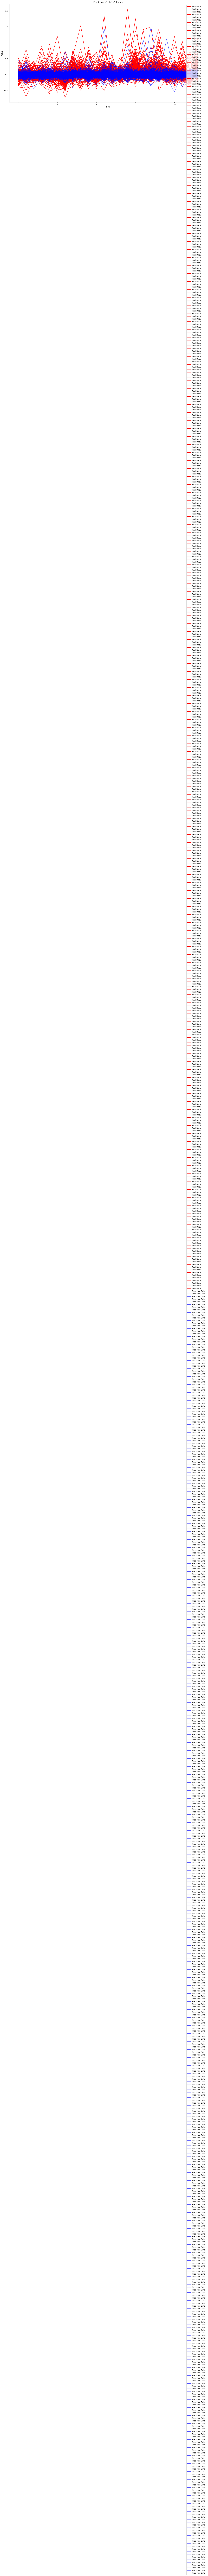

In [ ]:
# Vẽ biểu đồ dữ liệu thực và dữ liệu dự đoán
plt.figure(figsize=(20, 10))
plt.plot(actual_data, color='red', label='Real Data')
plt.plot(predicted_data, color='blue', label='Predicted Data', alpha=0.7)
plt.title('Prediction of 1141 Columns')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Dự báo 3 tháng tiếp theo
n_future_steps = 3
last_values = test_set_scaled[-time_steps:]

In [ ]:
predictions = []
for _ in range(n_future_steps):
    prediction = regressor.predict(last_values.reshape(1, time_steps, dataset_train.shape[1]))
    predictions.append(prediction[0])
    last_values = np.append(last_values[1:], prediction, axis=0)

# Đảo ngược chuẩn hóa các giá trị dự đoán
future_predictions = sc.inverse_transform(predictions)


1/1 [==============================] - 0s 34ms/step


In [ ]:
# In ra các giá trị dự báo
print("Future predictions for the next 3 months:")
print(future_predictions)

Future predictions for the next 3 months:
[[-0.0237907   0.02675086 -0.02021734 ...  0.00139199 -0.01699957
  -0.09702547]
 [-0.01786022 -0.01855439  0.00201091 ... -0.0235657  -0.01984037
  -0.00942491]
 [-0.022916   -0.08971587 -0.01904242 ... -0.01461524 -0.03293185
   0.02520274]]


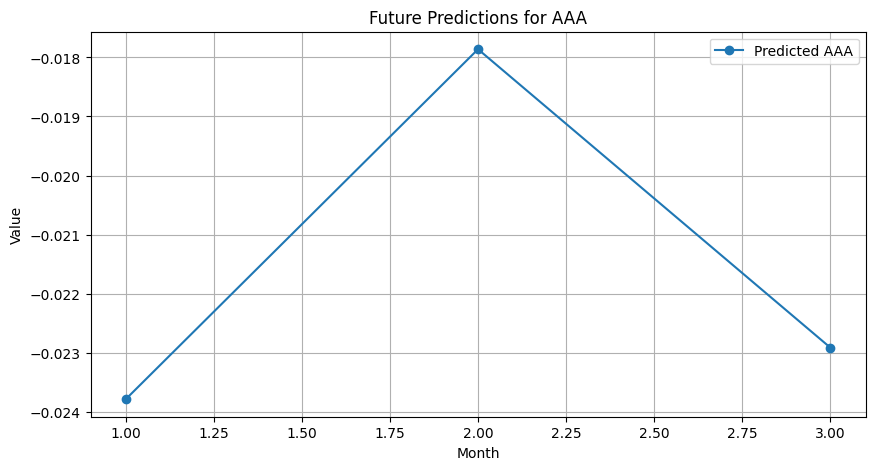

In [ ]:
# Chọn chuỗi để hiển thị biểu đồ (ví dụ chuỗi "AAA")
column_name = 'AAA'
column_index = df_train.columns.get_loc(column_name) - 1  # Trừ đi 1 vì đã bỏ cột 'Date'

# Vẽ biểu đồ các giá trị dự báo của chuỗi "AAA"
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_future_steps+1), future_predictions[:, column_index], marker='o', label=f'Predicted {column_name}')
plt.title(f'Future Predictions for {column_name}')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Visualize
- Phần này được xử lý trong thông qua Excel. Biểu đồ nằm trong file Predicted_Full.csv

In [ ]:
# Đọc dữ liệu từ file CSV
df_full = pd.read_csv('LSTM_Full.csv')
df_predict = pd.read_csv('Result_predict.csv')

In [ ]:
# Lấy cột Date và cột dữ liệu của chuỗi "AAA"
dates_full = df_full['Date']
data_aaa_full = df_full['AAA']

In [ ]:
# Lấy các giá trị của chuỗi "AAA" từ file Result_predict.csv
dates_predict = df_predict['Date']
data_aaa_predict = df_predict['AAA']

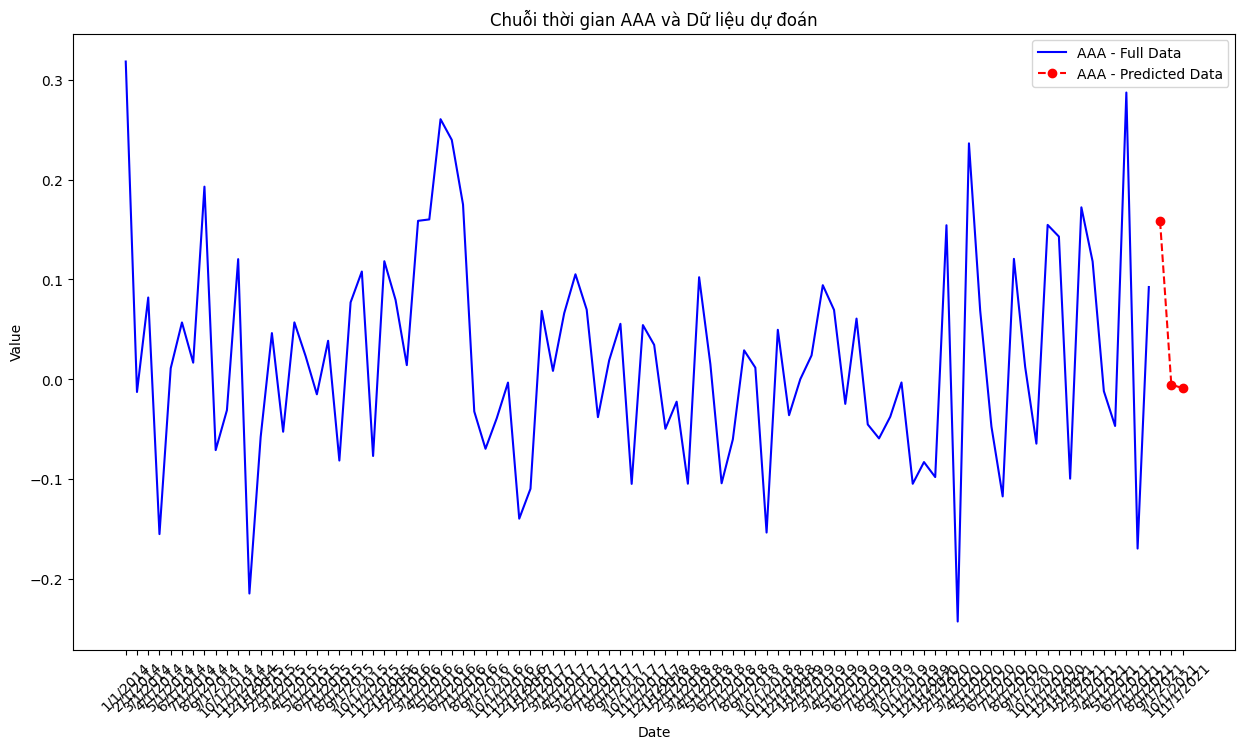

In [ ]:
# Vẽ biểu đồ chuỗi thời gian "AAA"
plt.figure(figsize=(15, 8))
plt.plot(dates_full, data_aaa_full, color='blue', label='AAA - Full Data')
plt.plot(dates_predict, data_aaa_predict, color='red', linestyle='--', marker='o', label='AAA - Predicted Data')
plt.title('Chuỗi thời gian AAA và Dữ liệu dự đoán')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()

In [ ]:
# Lưu các giá trị dự báo vào file CSV
predicted_df = pd.DataFrame(future_predictions, columns=df_train.columns[1:])
predicted_df.to_csv('Predicted.csv', index=True)